In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

In [2]:
def load_dataset():
    train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [3]:
train_dataset = h5py.File('datasets/train_catvnoncat.h5','r')
train_set_x_orig = np.array(train_dataset['train_set_x'][:])
train_set_y_orig = np.array(train_dataset['train_set_y'][:])
test_dataset = h5py.File('datasets/test_catvnoncat.h5','r')
test_set_x_orig = np.array(test_dataset['test_set_x'][:])
test_set_y_orig = np.array(test_dataset['test_set_y'][:])
train_set_y_orig = train_set_y_orig.reshape((1,train_set_y_orig.shape[0]))
test_set_y_orig = test_set_y_orig.reshape((1,test_set_y_orig.shape[0]))
classes = np.array(test_dataset['list_classes'][:])
print(train_set_x_orig.shape,train_set_y_orig.shape)
print(test_set_x_orig.shape,test_set_y_orig.shape)
print(classes)

(209, 64, 64, 3) (1, 209)
(50, 64, 64, 3) (1, 50)
[b'non-cat' b'cat']


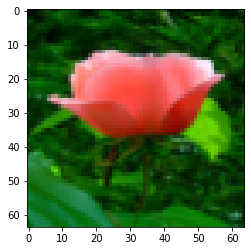

In [4]:
plt.imshow(train_set_x_orig[3])

In [5]:
train_set_x_orig.shape

(209, 64, 64, 3)

In [6]:
# 由于使用logistic回归，需要将图片转换格式
train_set_x_flatten = train_set_x_orig.reshape((train_set_x_orig.shape[0],-1))
test_set_x_flatten = test_set_x_orig.reshape((test_set_x_orig.shape[0],-1))
print(train_set_x_flatten.shape,test_set_x_flatten.shape)

(209, 12288) (50, 12288)


In [7]:
# 标准化数据
train_set_x = train_set_x_flatten / 255.
test_set_x = test_set_x_flatten / 255.

In [84]:
# 
def sigmoid(x):
    return 1.0 / (1 + np.exp(-x))
# 定义W，b
dim = train_set_x.shape[1]
W  =  np.zeros((1,dim))
b = 0

In [85]:
# 
def propagate(W,b,X,y):
    # 前向
    m = X.shape[0] 
    Z = np.dot(W,X.T) + b
    A = sigmoid(Z)
    # print(A)
    J = -1.0 / m * np.sum(y*np.log(A) + ((1-y)*np.log(1-A)))
   
    # 反向
    dw = 1.0 / m * np.dot((A - y),X)
    db = 1.0 / m * np.sum(A - y)
    
    return dw,db,J
    

In [86]:
# 
def optimize(W,b,X,y,alpha,iterations = 100):
    costs = []
    for i in range(iterations):
        dw,db,J = propagate(W,b,X,y)
        W -= alpha * dw
        b -= alpha * db
        if i % 100 == 0:
            costs.append(J)
            print('当前迭代轮次为%d,损失为：%f'%(i,J))
    return W,b,J

In [87]:
# 
def predict(W,b,X):
    y_pred = sigmoid(np.dot(W,X.T) + b)
    y_pred_flg = np.where(y_pred >= 0.5,1,0)
    
    return y_pred_flg
    
    

In [88]:
# 完整流程
W,b,J = optimize(W,b,train_set_x,train_set_y_orig,alpha = 0.005,iterations=2000)
y_pred = predict(W,b,train_set_x)

当前迭代轮次为0,损失为：0.693147
当前迭代轮次为100,损失为：0.584508
当前迭代轮次为200,损失为：0.466949
当前迭代轮次为300,损失为：0.376007
当前迭代轮次为400,损失为：0.331463
当前迭代轮次为500,损失为：0.303273
当前迭代轮次为600,损失为：0.279880
当前迭代轮次为700,损失为：0.260042
当前迭代轮次为800,损失为：0.242941
当前迭代轮次为900,损失为：0.228004
当前迭代轮次为1000,损失为：0.214820
当前迭代轮次为1100,损失为：0.203078
当前迭代轮次为1200,损失为：0.192544
当前迭代轮次为1300,损失为：0.183033
当前迭代轮次为1400,损失为：0.174399
当前迭代轮次为1500,损失为：0.166521
当前迭代轮次为1600,损失为：0.159305
当前迭代轮次为1700,损失为：0.152667
当前迭代轮次为1800,损失为：0.146542
当前迭代轮次为1900,损失为：0.140872


In [92]:
# 计算准确率
np.sum(y_pred == train_set_y_orig) / train_set_y_orig.shape[1]

0.9904306220095693

In [93]:
# 测试集上
y_pred_test = predict(W,b,test_set_x)
np.sum(y_pred_test == test_set_y_orig) / test_set_y_orig.shape[1]

0.7